<a href="https://colab.research.google.com/github/andresanchetta/Aulas_Udemy/blob/main/Exercicios/RN%20e%20DL/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Código utilizará a técnica de deep learning para identificar caracteres numéricos escritos a mão, a obtenção desses dados se da pela biblioteca ```keras.dataset```.  
Essa base de dados possui 60 mil exemplos de treino e 10 mil exemplos de teste.  
Consiste em instancias com 785 atributos, sendo 784 valores de RGB que compoem a matrix 28x28 da imagem e a ultimo atributo o qual classifica qual o número escrito, nosso target.  
É possivel saber mais sobre o data set em: http://yann.lecun.com/exdb/mnist/

11493376/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '0')

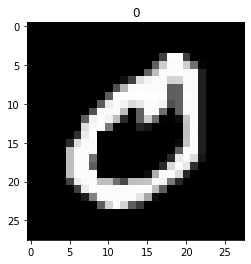

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [3]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [5]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [6]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
# 'relu' - Rectified Linear Unit, muito utilizada com imagens. f(x)=0 se x<=0, f(x)=x se x>0
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [8]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20, #Para maior acertividade aumentar o numero de epochs p/ 500 ou 1000
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7332 - accuracy: 0.7631 - val_loss: 0.1650 - val_accuracy: 0.9502
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2533 - accuracy: 0.9273 - val_loss: 0.1383 - val_accuracy: 0.9581
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1947 - accuracy: 0.9430 - val_loss: 0.1291 - val_accuracy: 0.9616
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1727 - accuracy: 0.9500 - val_loss: 0.1048 - val_accuracy: 0.9695
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1535 - accuracy: 0.9539 - val_loss: 0.1031 - val_accuracy: 0.9696
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1413 - accuracy: 0.9572 - val_loss: 0.0921 - val_accuracy: 0.9715
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1314 - accuracy: 0.9608 - val_loss: 0.0972 - val_accuracy:

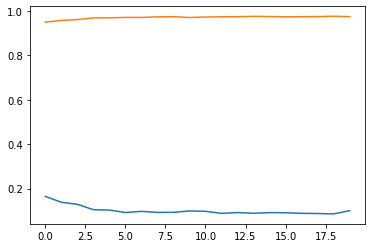

In [10]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [11]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

array([[2.6148692e-09, 1.1720221e-07, 3.8518601e-06, ..., 9.9997020e-01,
        1.0399749e-08, 2.2504746e-05],
       [1.0374691e-09, 3.8090366e-06, 9.9995029e-01, ..., 2.4355862e-05,
        1.7130713e-08, 4.9484028e-13],
       [1.7407341e-10, 9.9996579e-01, 8.8394941e-08, ..., 7.6430752e-06,
        2.5515410e-05, 7.4015816e-08],
       ...,
       [1.6734853e-13, 1.8988618e-10, 2.2564299e-10, ..., 4.9275024e-09,
        1.5288859e-11, 4.7898112e-07],
       [3.7132302e-12, 9.0972724e-12, 3.4570339e-12, ..., 1.7155309e-14,
        3.2139152e-07, 1.3016740e-10],
       [5.0328502e-14, 2.8200014e-19, 4.2583416e-14, ..., 1.3202750e-22,
        4.7482070e-13, 1.0045057e-19]], dtype=float32)

In [12]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 966,    0,    0,    0,    0,    1,    8,    1,    4,    0],
       [   0, 1122,    1,    1,    0,    0,    2,    0,    9,    0],
       [   5,    0,  996,    0,    4,    1,    3,    7,   16,    0],
       [   1,    1,    1,  991,    0,    4,    0,    5,    5,    2],
       [   2,    0,    3,    0,  962,    0,    7,    0,    1,    7],
       [   3,    1,    0,    8,    1,  863,    6,    2,    7,    1],
       [   5,    2,    0,    0,    3,    2,  942,    0,    4,    0],
       [   2,    3,   11,    1,    2,    0,    0,  999,    2,    8],
       [   6,    1,    1,    3,    4,    4,    1,    4,  948,    2],
       [   4,    3,    0,    5,   19,    4,    2,    6,    6,  960]])

In [13]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]